# Analyze Return Periods with Stationary/Non-Stationary Estimates

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
import utils
from astropy.stats import bootstrap as bootstrap
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats as ss
import scipy.signal
from mk_test import mk_test
import os

In [2]:
Objectives = ['Hydropower', 'Environment', 'Recession', 'Sugar', 'Cotton', 'Uncontrolled'] 
colors = ['#999999', "forestgreen", "cornflowerblue", "mediumpurple", "orange", "black"]
col_dict = {'Hydropower':'#999999', 'Environment':'forestgreen', 'Recession':'cornflowerblue', 'Sugar':'mediumpurple', 'Cotton':'orange', 'Uncontrolled':'black'}

In [3]:
returnPeriods = dict.fromkeys(Objectives)

for col in Objectives:
    returnPeriods[col] = pd.read_csv('../Data/ReturnPeriods_%s.csv' % col[0:3])

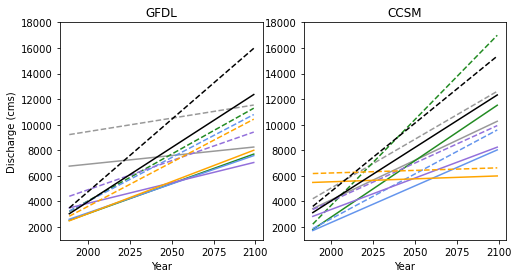

In [4]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(8,4)
for col in Objectives:
    ax1.plot(returnPeriods[col]['Year'], returnPeriods[col]['GFDL.q100'], color = col_dict[col])
    ax1.plot(returnPeriods[col]['Year'], returnPeriods[col]['GFDL.q500'], color = col_dict[col], linestyle='dashed')
    ax2.plot(returnPeriods[col]['Year'], returnPeriods[col]['CCSM.q100'], color = col_dict[col])
    ax2.plot(returnPeriods[col]['Year'], returnPeriods[col]['CCSM.q500'], color = col_dict[col], linestyle='dashed')
for ax in [ax1, ax2]:
    ax.set_ylim(1000,18000)
    ax.set_xlabel("Year")
ax1.set_title("GFDL")
ax2.set_title("CCSM")
ax1.set_ylabel("Discharge (cms)")
plt.show()

In [5]:
historicalStat = dict.fromkeys(Objectives)

for col in Objectives:
    historicalStat[col] = pd.read_csv('../Data/HistStatCI_%s.csv' % col[0:3])
    historicalStat[col].columns = historicalStat[col].iloc[0]
    historicalStat[col] = historicalStat[col].iloc[1:]
    #historicalStat[col] = historicalStat[col].transpose()

In [6]:
historicalStat

{'Hydropower': 0                  Obj        Hydropower
 1   GFDL.q100.location   2790.4465061655
 2       GFDL.q100.90LB  2031.19577214789
 3       GFDL.q100.90UB  2927.67117177292
 4   GFDL.q500.location  2894.23572439825
 5       GFDL.q500.90LB  2217.43375626483
 6       GFDL.q500.90UB  3147.84459736947
 7   CCSM.q100.location   2790.4465061655
 8       CCSM.q100.90LB  2196.05384976746
 9       CCSM.q100.90UB  3008.20666453652
 10  CCSM.q500.location  2894.23572439825
 11      CCSM.q500.90LB   2204.4552812421
 12      CCSM.q500.90UB  3129.56294717106,
 'Environment': 0                  Obj       Environment
 1   GFDL.q100.location  2523.02606431479
 2       GFDL.q100.90LB   1766.9857863879
 3       GFDL.q100.90UB  2758.03843946155
 4   GFDL.q500.location  2785.23002404384
 5       GFDL.q500.90LB   1706.0576747509
 6       GFDL.q500.90UB  3019.08055924895
 7   CCSM.q100.location  2523.02606431479
 8       CCSM.q100.90LB  1700.40016202369
 9       CCSM.q100.90UB  2727.37999750397
 10 

In [7]:
historicalStatMLE = dict.fromkeys(Objectives)

for col in Objectives:
    historicalStatMLE[col] = pd.read_csv('../Data/HistStatCIMLE_%s.csv' % col[0:3])
    historicalStatMLE[col].columns = historicalStatMLE[col].iloc[0]
    historicalStatMLE[col] = historicalStatMLE[col].iloc[1:]
    #historicalStat[col] = historicalStat[col].transpose()

In [8]:
historicalStatMLE

{'Hydropower': 0                  Obj        Hydropower
 1   GFDL.q100.location  2661.56338894538
 2       GFDL.q100.90LB  2265.47339909698
 3       GFDL.q100.90UB  3269.02941815558
 4   GFDL.q500.location  2724.19124958348
 5       GFDL.q500.90LB  2507.29934200184
 6       GFDL.q500.90UB  3939.34110376097
 7   CCSM.q100.location  2661.56338894538
 8       CCSM.q100.90LB  2485.09206490676
 9       CCSM.q100.90UB  3326.49865263071
 10  CCSM.q500.location  2724.19124958348
 11      CCSM.q500.90LB  2507.44442751835
 12      CCSM.q500.90UB  4092.00497468562,
 'Environment': 0                  Obj       Environment
 1   GFDL.q100.location  2594.15361697536
 2       GFDL.q100.90LB  2318.04101339235
 3       GFDL.q100.90UB  3568.62603376435
 4   GFDL.q500.location  2949.52904821472
 5       GFDL.q500.90LB  2393.71790481092
 6       GFDL.q500.90UB  4891.67717115683
 7   CCSM.q100.location  2594.15361697536
 8       CCSM.q100.90LB  2250.60404240471
 9       CCSM.q100.90UB  3477.99504357917
 10 

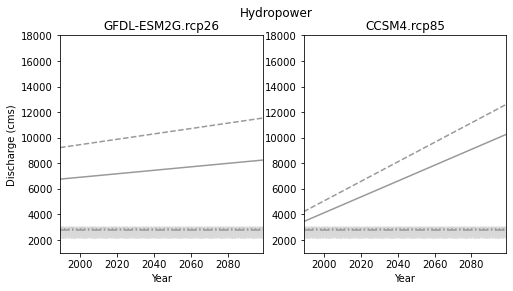

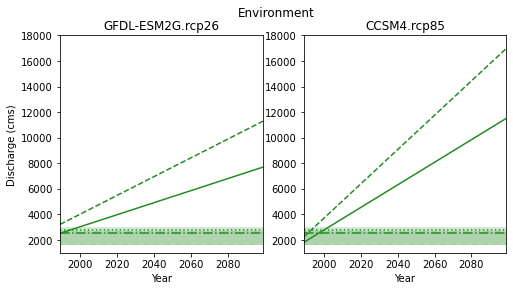

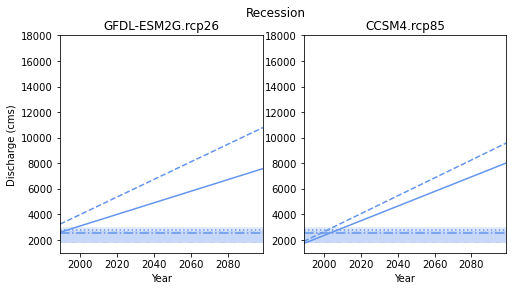

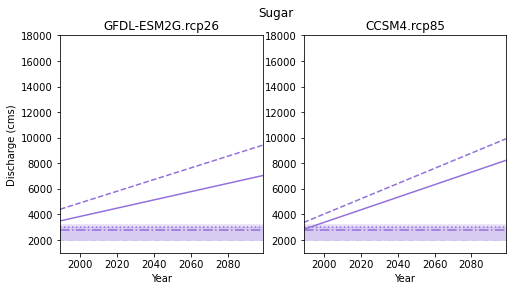

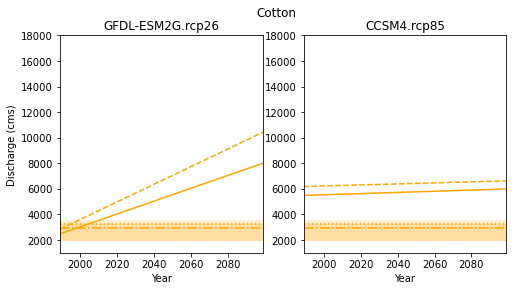

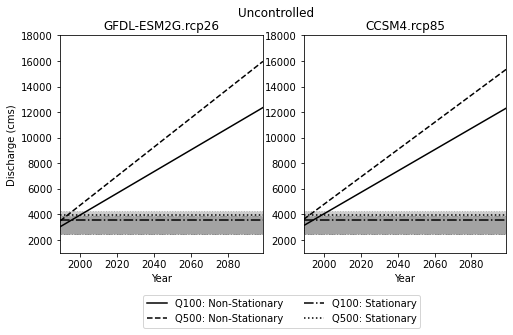

In [75]:
for col in Objectives:
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(8,4)
    fig.suptitle("%s" % col)
    ax1.plot(returnPeriods[col]['Year'], returnPeriods[col]['GFDL.q100'], color = col_dict[col])
    ax1.plot(returnPeriods[col]['Year'], returnPeriods[col]['GFDL.q500'], color = col_dict[col], linestyle='dashed')
    ax1.axhline(float(historicalStat[col].iloc[0,1]), color=col_dict[col], linestyle="dashdot")
    ax1.axhline(float(historicalStat[col].iloc[3,1]), color=col_dict[col], linestyle="dotted")
    
    LB = [float(historicalStat[col].iloc[7,1])] *111
    UB = [float(historicalStat[col].iloc[8,1])] * 111
    ax1.fill_between(returnPeriods[col]['Year'], LB, UB, color = col_dict[col], alpha=0.2, linestyle="dashdot")
    
    LB = [float(historicalStat[col].iloc[10,1])] *111
    UB = [float(historicalStat[col].iloc[11,1])] * 111
    ax1.fill_between(returnPeriods[col]['Year'], LB, UB, color = col_dict[col], alpha=0.2, linestyle="dotted")
#     ax1.plot(returnPeriods['Uncontrolled']['Year'], returnPeriods['Uncontrolled']['GFDL.q100'], color = col_dict['Uncontrolled'])
#     ax1.plot(returnPeriods['Uncontrolled']['Year'], returnPeriods['Uncontrolled']['GFDL.q500'], color = col_dict['Uncontrolled'], linestyle='dashed')
#     ax1.axhline(float(historicalStat['Uncontrolled'].iloc[0,1]), color=col_dict['Uncontrolled'])
    
    ax2.plot(returnPeriods[col]['Year'], returnPeriods[col]['CCSM.q100'], color = col_dict[col], label = "Q100: Non-Stationary")
    ax2.plot(returnPeriods[col]['Year'], returnPeriods[col]['CCSM.q500'], color = col_dict[col], linestyle='dashed', label = "Q500: Non-Stationary")
    ax2.axhline(float(historicalStat[col].iloc[6,1]), color=col_dict[col], linestyle="dashdot", label="Q100: Stationary")
    ax2.axhline(float(historicalStat[col].iloc[9,1]), color=col_dict[col], linestyle="dotted", label = "Q500: Stationary")

    LB = [float(historicalStat[col].iloc[7,1])] *111
    UB = [float(historicalStat[col].iloc[8,1])] * 111
    ax2.fill_between(returnPeriods[col]['Year'], LB, UB, color = col_dict[col], alpha=0.2, linestyle="dashdot")    

    LB = [float(historicalStat[col].iloc[10,1])] *111
    UB = [float(historicalStat[col].iloc[11,1])] * 111
    ax2.fill_between(returnPeriods[col]['Year'], LB, UB, color = col_dict[col], alpha=0.2, linestyle="dotted")
    
    
    for ax in [ax1, ax2]:
        ax.set_ylim(1000,18000)
        ax.set_xlabel("Year")
        ax.set_xlim(1989,2099)
    ax1.set_title("GFDL-ESM2G.rcp26")
    ax2.set_title("CCSM4.rcp85")
    ax1.set_ylabel("Discharge (cms)")
    if col == "Uncontrolled":
        ax.legend(ncol = 2, bbox_to_anchor = (0.6, -0.17))
    
    plt.savefig('../Figures/MOM_Estimates_%s.png' % col, bbox_inches="tight")
    plt.show()

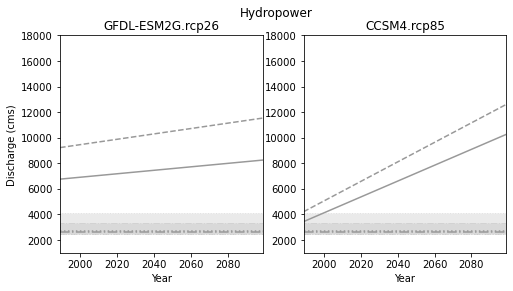

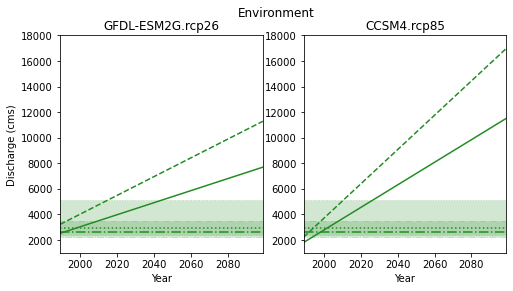

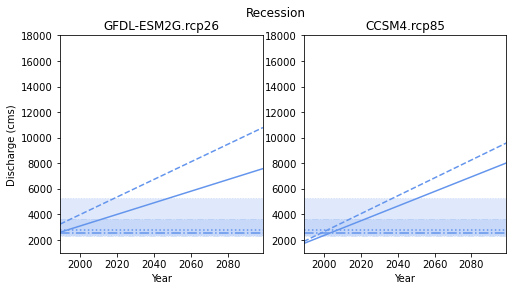

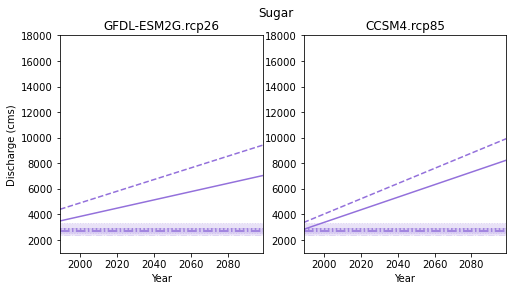

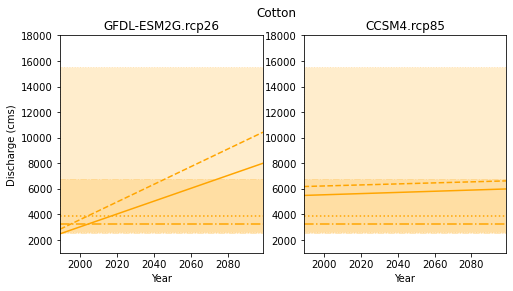

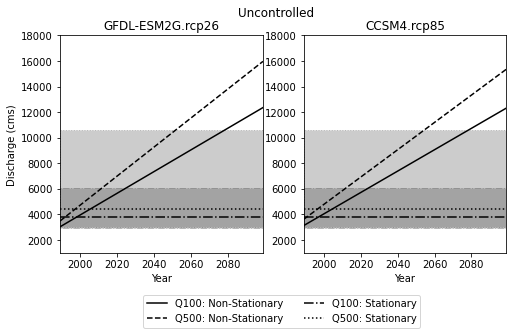

In [74]:
for col in Objectives:
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(8,4)
    fig.suptitle("%s" % col)
    ax1.plot(returnPeriods[col]['Year'], returnPeriods[col]['GFDL.q100'], color = col_dict[col], label = "Q100")
    ax1.plot(returnPeriods[col]['Year'], returnPeriods[col]['GFDL.q500'], color = col_dict[col], linestyle="dashed", label='Q500')
    ax1.axhline(float(historicalStatMLE[col].iloc[0,1]), color=col_dict[col], linestyle="dashdot")
    ax1.axhline(float(historicalStatMLE[col].iloc[3,1]), color=col_dict[col], linestyle="dotted")
    
    LB = [float(historicalStatMLE[col].iloc[7,1])] *111
    UB = [float(historicalStatMLE[col].iloc[8,1])] * 111
    ax1.fill_between(returnPeriods[col]['Year'], LB, UB, color = col_dict[col], alpha=0.2, linestyle="dashdot")
    
    LB = [float(historicalStatMLE[col].iloc[10,1])] *111
    UB = [float(historicalStatMLE[col].iloc[11,1])] * 111
    ax1.fill_between(returnPeriods[col]['Year'], LB, UB, color = col_dict[col], alpha=0.2, linestyle="dotted")
#     ax1.plot(returnPeriods['Uncontrolled']['Year'], returnPeriods['Uncontrolled']['GFDL.q100'], color = col_dict['Uncontrolled'])
#     ax1.plot(returnPeriods['Uncontrolled']['Year'], returnPeriods['Uncontrolled']['GFDL.q500'], color = col_dict['Uncontrolled'], linestyle='dashed')
#     ax1.axhline(float(historicalStat['Uncontrolled'].iloc[0,1]), color=col_dict['Uncontrolled'])
    
    ax2.plot(returnPeriods[col]['Year'], returnPeriods[col]['CCSM.q100'], color = col_dict[col], label = "Q100: Non-Stationary")
    ax2.plot(returnPeriods[col]['Year'], returnPeriods[col]['CCSM.q500'], color = col_dict[col], linestyle='dashed', label = "Q500: Non-Stationary")
    ax2.axhline(float(historicalStatMLE[col].iloc[6,1]), color=col_dict[col], linestyle="dashdot", label = "Q100: Stationary")
    ax2.axhline(float(historicalStatMLE[col].iloc[9,1]), color=col_dict[col], linestyle="dotted", label = "Q500: Stationary")

    LB = [float(historicalStatMLE[col].iloc[7,1])] *111
    UB = [float(historicalStatMLE[col].iloc[8,1])] * 111
    ax2.fill_between(returnPeriods[col]['Year'], LB, UB, color = col_dict[col], alpha=0.2, linestyle="dashdot")    

    LB = [float(historicalStatMLE[col].iloc[10,1])] *111
    UB = [float(historicalStatMLE[col].iloc[11,1])] * 111
    ax2.fill_between(returnPeriods[col]['Year'], LB, UB, color = col_dict[col], alpha=0.2, linestyle="dotted")
    
    
    for ax in [ax1, ax2]:
        ax.set_ylim(1000,18000)
        ax.set_xlabel("Year")
        ax.set_xlim(1989,2099)
    ax1.set_title("GFDL-ESM2G.rcp26")
    ax2.set_title("CCSM4.rcp85")
    ax1.set_ylabel("Discharge (cms)")
    
    if col == "Uncontrolled":
        ax.legend(ncol = 2, bbox_to_anchor = (0.6, -0.17))
    
    plt.savefig('../Figures/MLE_Estimates_%s.png' % col, bbox_inches="tight")
    plt.show()


In [60]:
returnPeriods['Uncontrolled']

,Unnamed: 0,Year,GFDL.q100,GFDL.q500,CCSM.q100,CCSM.q500
0,1,1989,3036.503215,3493.063743,3125.298389,3613.221746
1,2,1990,3121.245181,3606.489010,3208.913046,3720.037198
2,3,1991,3205.987146,3719.914278,3292.527704,3826.852650
3,4,1992,3290.729111,3833.339545,3376.142362,3933.668103
4,5,1993,3375.471076,3946.764813,3459.757020,4040.483555
...,...,...,...,...,...,...
106,107,2095,12019.151521,15516.142109,11988.452121,14935.659684
107,108,2096,12103.893487,15629.567377,12072.066779,15042.475136
108,109,2097,12188.635452,15742.992644,12155.681437,15149.290588
109,110,2098,12273.377417,15856.417912,12239.296095,15256.106040
